In [1]:
import pandas as pd
import matplotlib.pylab as plt
%pylab inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
import matplotlib.mlab as mlab

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
features = pd.read_csv('../data_processed/acs_merged_features')
complaints = pd.read_csv('../data_processed/DOB_count_illegal_conv_2015_ZC')

In [3]:
features.head()

,Unnamed: 0,Zip Code,Unemployment Rate for Pop > 16 Years (%),Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well',2015 Median Household Income,Count of Illegal Resident Conversion Violations
0,0,6390.0,9.8,0.0,151083,NaN
1,1,10001.0,8.4,11.0,86801,0.0
2,2,10002.0,8.9,37.4,33726,2.0
3,3,10003.0,6.1,4.9,98151,3.0
4,4,10004.0,6.1,2.6,119691,0.0


In [4]:
#illegal conversion complaints from 2015
complaints.head()

,Unnamed: 0,Incident Zip,Count of Complaints
0,92,11208,642
1,156,11419,617
2,157,11420,438
3,125,11355,355
4,104,11220,331


In [5]:
print(len(complaints))

176


In [6]:
print(complaints.dtypes)
print(features.dtypes)

Unnamed: 0             int64
Incident Zip           int64
Count of Complaints    int64
dtype: object
Unnamed: 0                                                                                       int64
Zip Code                                                                                       float64
Unemployment Rate for Pop > 16 Years (%)                                                        object
Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well'     object
2015 Median Household Income                                                                    object
Count of Illegal Resident Conversion Violations                                                float64
dtype: object


In [8]:
complaints['Incident Zip'] = complaints['Incident Zip'].astype(float)

In [9]:
print(complaints.dtypes)
print(features.dtypes)

Unnamed: 0               int64
Incident Zip           float64
Count of Complaints      int64
dtype: object
Unnamed: 0                                                                                       int64
Zip Code                                                                                       float64
Unemployment Rate for Pop > 16 Years (%)                                                        object
Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well'     object
2015 Median Household Income                                                                    object
Count of Illegal Resident Conversion Violations                                                float64
dtype: object


In [10]:
model = pd.merge(complaints, features, left_on='Incident Zip', right_on='Zip Code', how='left')

In [11]:
print(len(model))

176


In [12]:
model.isnull().sum()

Unnamed: 0_x                                                                                   0
Incident Zip                                                                                   0
Count of Complaints                                                                            0
Unnamed: 0_y                                                                                   1
Zip Code                                                                                       1
Unemployment Rate for Pop > 16 Years (%)                                                       1
Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well'    1
2015 Median Household Income                                                                   1
Count of Illegal Resident Conversion Violations                                                1
dtype: int64

In [13]:
model = model.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Zip Code'], axis=1)

In [14]:
model.head()

,Incident Zip,Count of Complaints,Unemployment Rate for Pop > 16 Years (%),Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well',2015 Median Household Income,Count of Illegal Resident Conversion Violations
0,11208.0,642,10.2,16.9,35698,19.0
1,11419.0,617,10.2,14.8,58266,22.0
2,11420.0,438,11.0,11.3,59660,19.0
3,11355.0,355,7.2,65.8,39168,25.0
4,11220.0,331,9.5,56.3,38893,9.0


In [15]:
model = model.rename(columns={'Count of Complaints':'complaints', 'Unemployment Rate for Pop > 16 Years (%)':'unemployment',"Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well'":'poor_english','2015 Median Household Income':'household_income', 'Count of Illegal Resident Conversion Violations':'violations'})

In [16]:
model.head()

,Incident Zip,complaints,unemployment,poor_english,household_income,violations
0,11208.0,642,10.2,16.9,35698,19.0
1,11419.0,617,10.2,14.8,58266,22.0
2,11420.0,438,11.0,11.3,59660,19.0
3,11355.0,355,7.2,65.8,39168,25.0
4,11220.0,331,9.5,56.3,38893,9.0


In [17]:
model.dtypes

Incident Zip        float64
complaints            int64
unemployment         object
poor_english         object
household_income     object
violations          float64
dtype: object

In [18]:
model = model.apply(pd.to_numeric, errors='coerce')

In [ ]:
#http://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
#assumptions of linear regression 
#1) relationship between x and y is linear 
#test with scatter plots
#2) error between observed and predicted (residuals) values must be normally distributed 
#test by plotting residual values on a histogram with a fitted normal curve or by reviewing a Q-Q-Plot
#3) little to no multicollinearity between independent variables
#4) standard mean error (error of the mean) of dependent variable is independent of independent variables

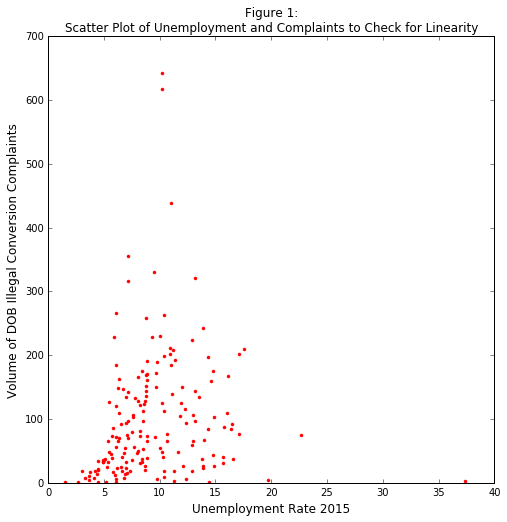

In [81]:
#is the relationship between x and y linear
plt.figure(figsize=(8,8))
plt.plot(model['unemployment'], model['complaints'], 'r.')
plt.title('Figure 1:\nScatter Plot of Unemployment and Complaints to Check for Linearity', fontsize=12)
plt.xlabel('Unemployment Rate 2015', fontsize=12)
plt.ylabel('Volume of DOB Illegal Conversion Complaints', fontsize=12)

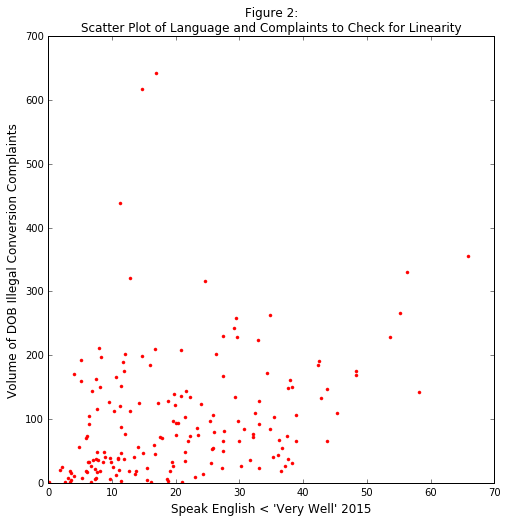

In [82]:
#is the relationship between x and y linear
plt.figure(figsize=(8,8))
plt.plot(model['poor_english'], model['complaints'], 'r.')
plt.title('Figure 2:\nScatter Plot of Language and Complaints to Check for Linearity', fontsize=12)
plt.xlabel("Speak English < 'Very Well' 2015", fontsize=12)
plt.ylabel('Volume of DOB Illegal Conversion Complaints', fontsize=12)

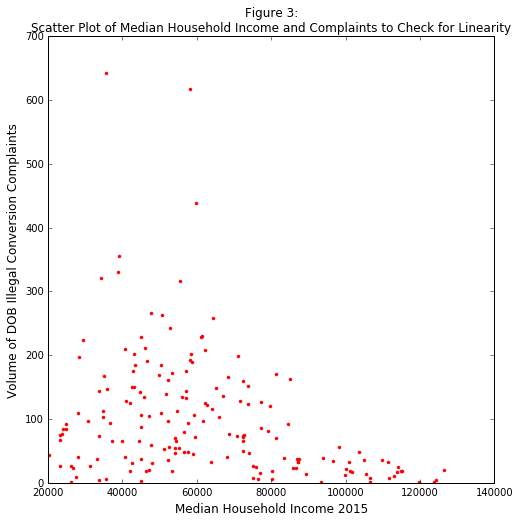

In [126]:
#is the relationship between x and y linear
plt.figure(figsize=(8,8))
plt.plot(model['household_income'], model['complaints'], 'r.')
plt.title('Figure 3:\nScatter Plot of Median Household Income and Complaints to Check for Linearity', fontsize=12)
plt.xlabel('Median Household Income 2015', fontsize=12)
plt.ylabel('Volume of DOB Illegal Conversion Complaints', fontsize=12)

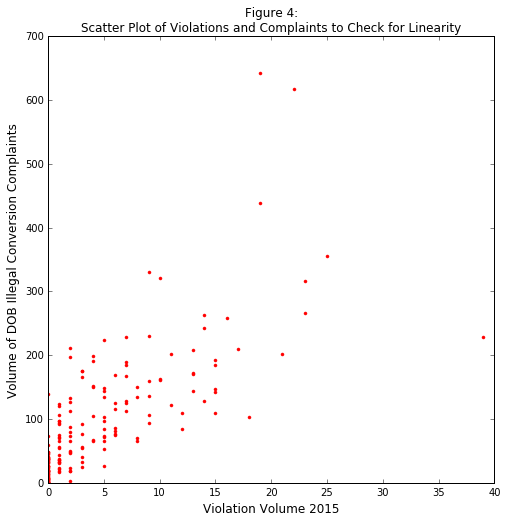

In [19]:
plt.figure(figsize=(8,8))
plt.plot(model['violations'], model['complaints'], 'r.')
plt.title('Figure 4:\nScatter Plot of Violations and Complaints to Check for Linearity', fontsize=12)
plt.xlabel('Violation Volume 2015', fontsize=12)
plt.ylabel('Volume of DOB Illegal Conversion Complaints', fontsize=12)

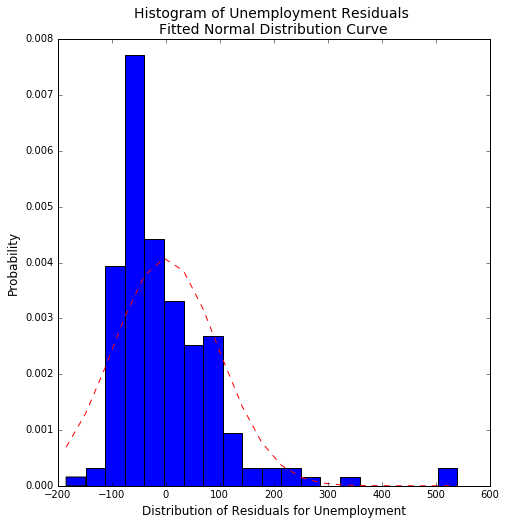

In [123]:
#are the residuals normally distributed
#https://pythonspot.com/en/matplotlib-histogram/

results = smf.ols('complaints ~ unemployment', data=model).fit()
residuals = sorted(results.resid) # just in case it isn't sorted

mu = np.mean(residuals) # mean of distribution
sigma = np.std(residuals) # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(residuals, num_bins, normed=1, facecolor='blue')
 
# add a 'normal best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Distribution of Residuals for Unemployment', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Histogram of Unemployment Residuals \nFitted Normal Distribution Curve', fontsize=14)
 
# tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

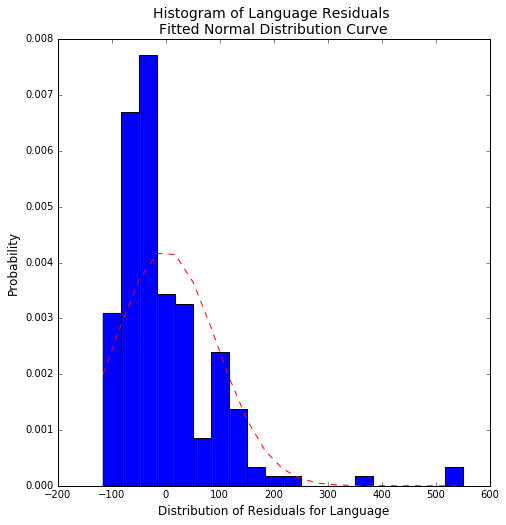

In [124]:
results = smf.ols('complaints ~ poor_english', data=model).fit()
residuals = sorted(results.resid) # just in case it isn't sorted

mu = np.mean(residuals) # mean of distribution
sigma = np.std(residuals) # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(residuals, num_bins, normed=1, facecolor='blue')
 
# add a 'normal best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Distribution of Residuals for Language', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Histogram of Language Residuals \nFitted Normal Distribution Curve', fontsize=14)
 
# tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

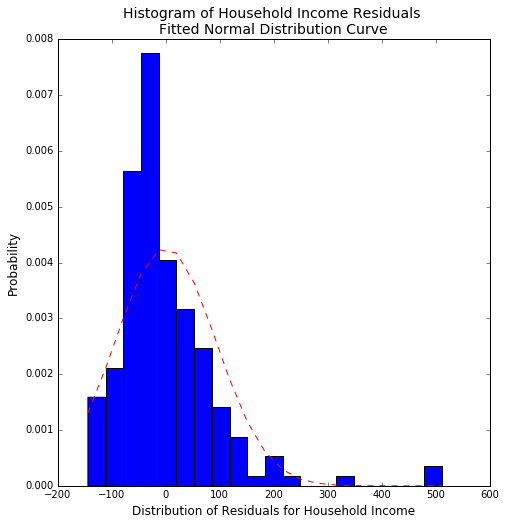

In [125]:
results = smf.ols('complaints ~ household_income', data=model).fit()
residuals = sorted(results.resid) # just in case it isn't sorted

mu = np.mean(residuals) # mean of distribution
sigma = np.std(residuals) # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(residuals, num_bins, normed=1, facecolor='blue')
 
# add a 'normal best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Distribution of Residuals for Household Income', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Histogram of Household Income Residuals \nFitted Normal Distribution Curve', fontsize=14)
 
# tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

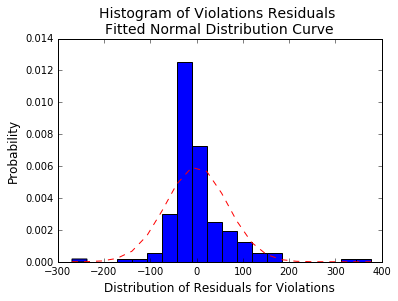

In [20]:
results = smf.ols('complaints ~ violations', data=model).fit()
residuals = sorted(results.resid) # just in case it isn't sorted

mu = np.mean(residuals) # mean of distribution
sigma = np.std(residuals) # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(residuals, num_bins, normed=1, facecolor='blue')
 
# add a 'normal best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Distribution of Residuals for Violations', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Histogram of Violations Residuals \nFitted Normal Distribution Curve', fontsize=14)
 
# tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

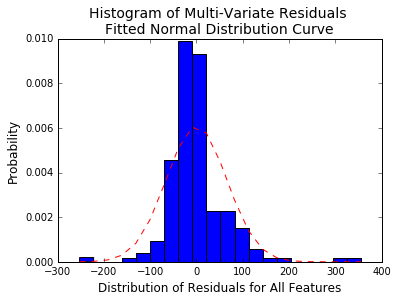

In [21]:
results = smf.ols('complaints ~ unemployment + poor_english + household_income + violations', data=model).fit()
residuals = sorted(results.resid) # just in case it isn't sorted

mu = np.mean(residuals) # mean of distribution
sigma = np.std(residuals) # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(residuals, num_bins, normed=1, facecolor='blue')
 
# add a 'normal best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Distribution of Residuals for All Features', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Histogram of Multi-Variate Residuals \nFitted Normal Distribution Curve', fontsize=14)
 
# tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [22]:
#are the variables correlated
model[['unemployment', 'poor_english', 'household_income', 'violations']].corr(method='pearson')

,unemployment,poor_english,household_income,violations
unemployment,1.000000,0.174834,-0.740440,0.112751
poor_english,0.174834,1.000000,-0.571972,0.417126
household_income,-0.740440,-0.571972,1.000000,-0.313553
violations,0.112751,0.417126,-0.313553,1.000000


In [23]:
#regress without dropping NA
results = smf.ols('complaints ~ unemployment + poor_english + household_income + violations', data=model).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             complaints   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     53.23
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           6.54e-29
Time:                        09:46:12   Log-Likelihood:                -969.08
No. Observations:                 173   AIC:                             1948.
Df Residuals:                     168   BIC:                             1964.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          122.0784     49.171      2.483      0.014      25.005     219.151
unemployment        -1.2147      2.237     -0.543      0.588      -5.631       3.201
poor_english        -0.9309      0.528     -1.762      0.080      -1.974       0.112
household_income    -0.0008      0.000     -1.978      0.050      -0.002   -1.32e-06
violations          11.5331      0.891     12.950      0.000       9.775      13.291
==============================================================================
Omnibus:                       80.279   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.765
Skew:                           1.564   Prob(JB):                    1.24e-116
Kurtosis:                      11.016   Cond. No.                     6.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.279
Date:                Sat, 21 Jan 2017   Prob (F-statistic):             0.0719
Time:                        11:09:32   Log-Likelihood:                -1050.2
No. Observations:                 175   AIC:                             2104.
Df Residuals:                     173   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.4908     17.929      3.876   

(-10, 660)

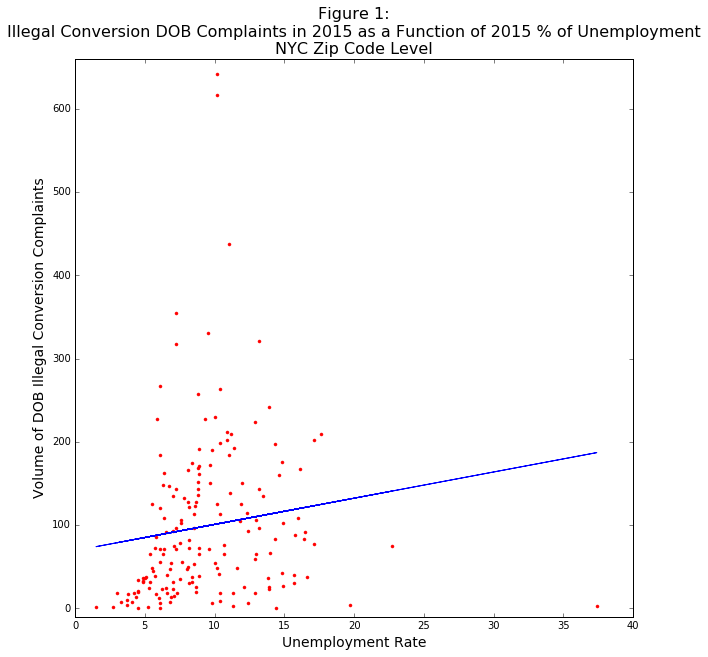

In [65]:
#plot each regressor against dependent variable
results = smf.ols('complaints ~ unemployment', data=model).fit()
print(results.summary())
plt.figure(figsize=(10,10))
plt.plot(model['unemployment'], model['complaints'], 'r.')
plt.plot(model['unemployment'], results.predict(sm.add_constant(model['unemployment'])), '-')
plt.title('Figure 1:\nIllegal Conversion DOB Complaints in 2015 as a Function of 2015 % of Unemployment\nNYC Zip Code Level', fontsize=16)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Volume of DOB Illegal Conversion Complaints', fontsize=14)
plt.ylim(-10, 660)

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     15.49
Date:                Sat, 21 Jan 2017   Prob (F-statistic):           0.000120
Time:                        11:12:01   Log-Likelihood:                -1044.4
No. Observations:                 175   AIC:                             2093.
Df Residuals:                     173   BIC:                             2099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       55.5212     13.188      4.210   

(-10, 660)

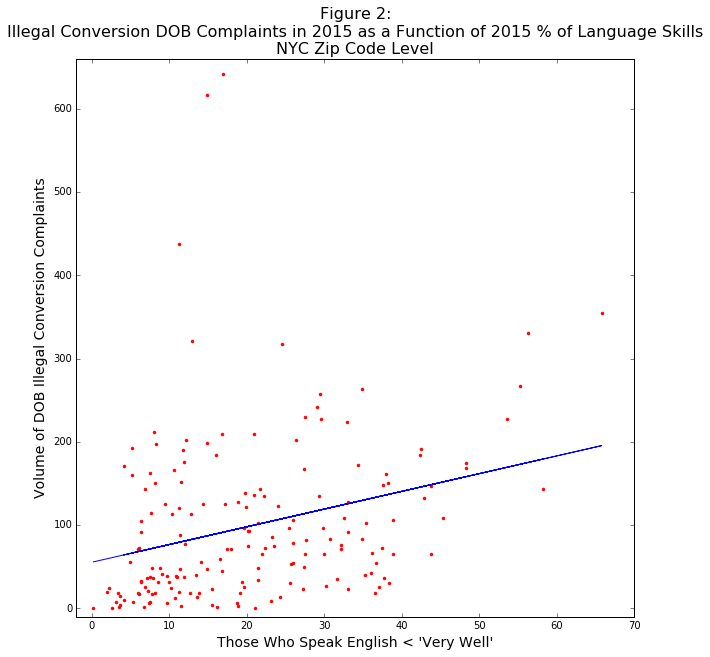

In [72]:
results = smf.ols('complaints ~ poor_english', data=model).fit()
print(results.summary())
plt.figure(figsize=(10,10))
plt.plot(model['poor_english'], model['complaints'], 'r.')
plt.plot(model['poor_english'], results.predict(sm.add_constant(model['poor_english'])), '-')
plt.title('Figure 2:\nIllegal Conversion DOB Complaints in 2015 as a Function of 2015 % of Language Skills\nNYC Zip Code Level', fontsize=16)
plt.xlabel("Those Who Speak English < 'Very Well'", fontsize=14)
plt.ylabel('Volume of DOB Illegal Conversion Complaints', fontsize=14)
plt.xlim(-2,70)
plt.ylim(-10,660)

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     19.81
Date:                Sat, 21 Jan 2017   Prob (F-statistic):           1.54e-05
Time:                        11:11:56   Log-Likelihood:                -1030.4
No. Observations:                 173   AIC:                             2065.
Df Residuals:                     171   BIC:                             2071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          177.3512     18.759  

(-10, 660)

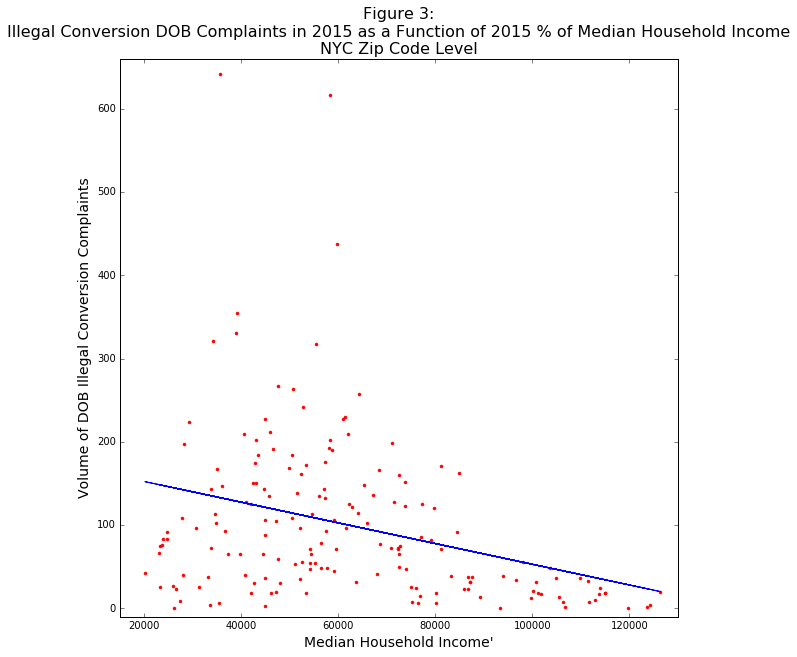

In [71]:
results = smf.ols('complaints ~ household_income', data=model).fit()
print(results.summary())
plt.figure(figsize=(10,10))
plt.plot(model['household_income'], model['complaints'], 'r.')
plt.plot(model['household_income'], results.predict(sm.add_constant(model['household_income'])), '-')
plt.title('Figure 3:\nIllegal Conversion DOB Complaints in 2015 as a Function of 2015 % of Median Household Income\nNYC Zip Code Level', fontsize=16)
plt.xlabel("Median Household Income'", fontsize=14)
plt.ylabel('Volume of DOB Illegal Conversion Complaints', fontsize=14)
plt.xlim(15000,130000)
plt.ylim(-10,660)

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           2.33e-31
Time:                        09:48:20   Log-Likelihood:                -983.07
No. Observations:                 175   AIC:                             1970.
Df Residuals:                     173   BIC:                             1976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.3161      6.375      6.795      0.0

(-5, 660)

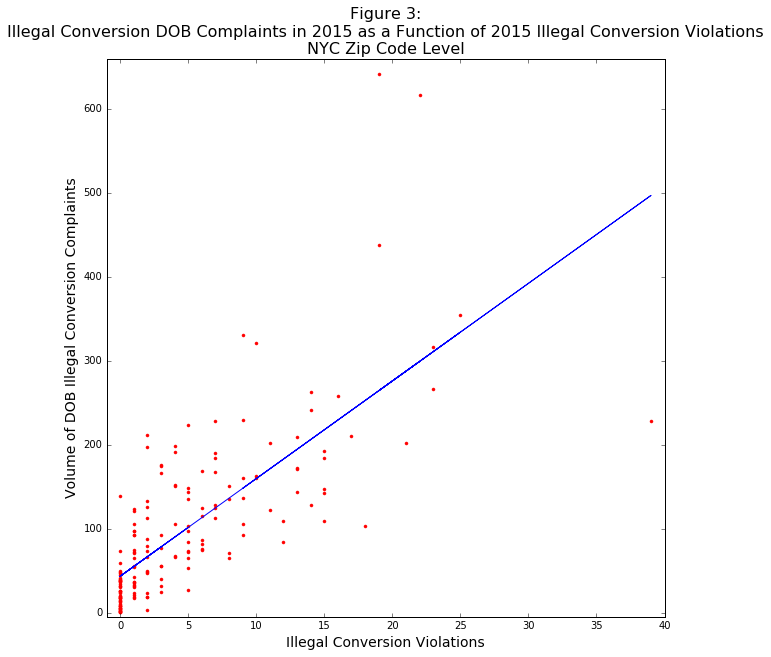

In [27]:
results = smf.ols('complaints ~ violations', data=model).fit()
print(results.summary())
plt.figure(figsize=(10,10))
plt.plot(model['violations'], model['complaints'], 'r.')
plt.plot(model['violations'], results.predict(sm.add_constant(model['violations'])), '-')
plt.title('Figure 3:\nIllegal Conversion DOB Complaints in 2015 as a Function of 2015 Illegal Conversion Violations\nNYC Zip Code Level', fontsize=16)
plt.xlabel("Illegal Conversion Violations", fontsize=14)
plt.ylabel('Volume of DOB Illegal Conversion Complaints', fontsize=14)
plt.xlim(-1,40)
plt.ylim(-5,660)